<a href="https://colab.research.google.com/github/ddebashish21/Laptop_Price_Predictor/blob/main/Laptop_Price_Prediction_for_SmartTech_Co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Price prediction of the laptops using ML models**

In [80]:
import pandas as pd # importing the essential libraries
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
data=pd.read_csv('/content/laptop.csv')
data.head() # Extarcting the data from the csv file and displaying it

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [82]:
data.shape # Checking the shape of the data

(1303, 13)

In [83]:
data.sample(5)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
878,878,878.0,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.18kg,48618.00
329,329,329.0,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,140605.92
1273,1273,1273.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1166,1166,1166.0,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,74059.20
112,112,112.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,74538.72


# **Data Preprocessing**

In [84]:
data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True) # Droping the unnecessary columns
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [86]:
data.isnull().sum() #Checking for null values in each column

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


<Axes: >

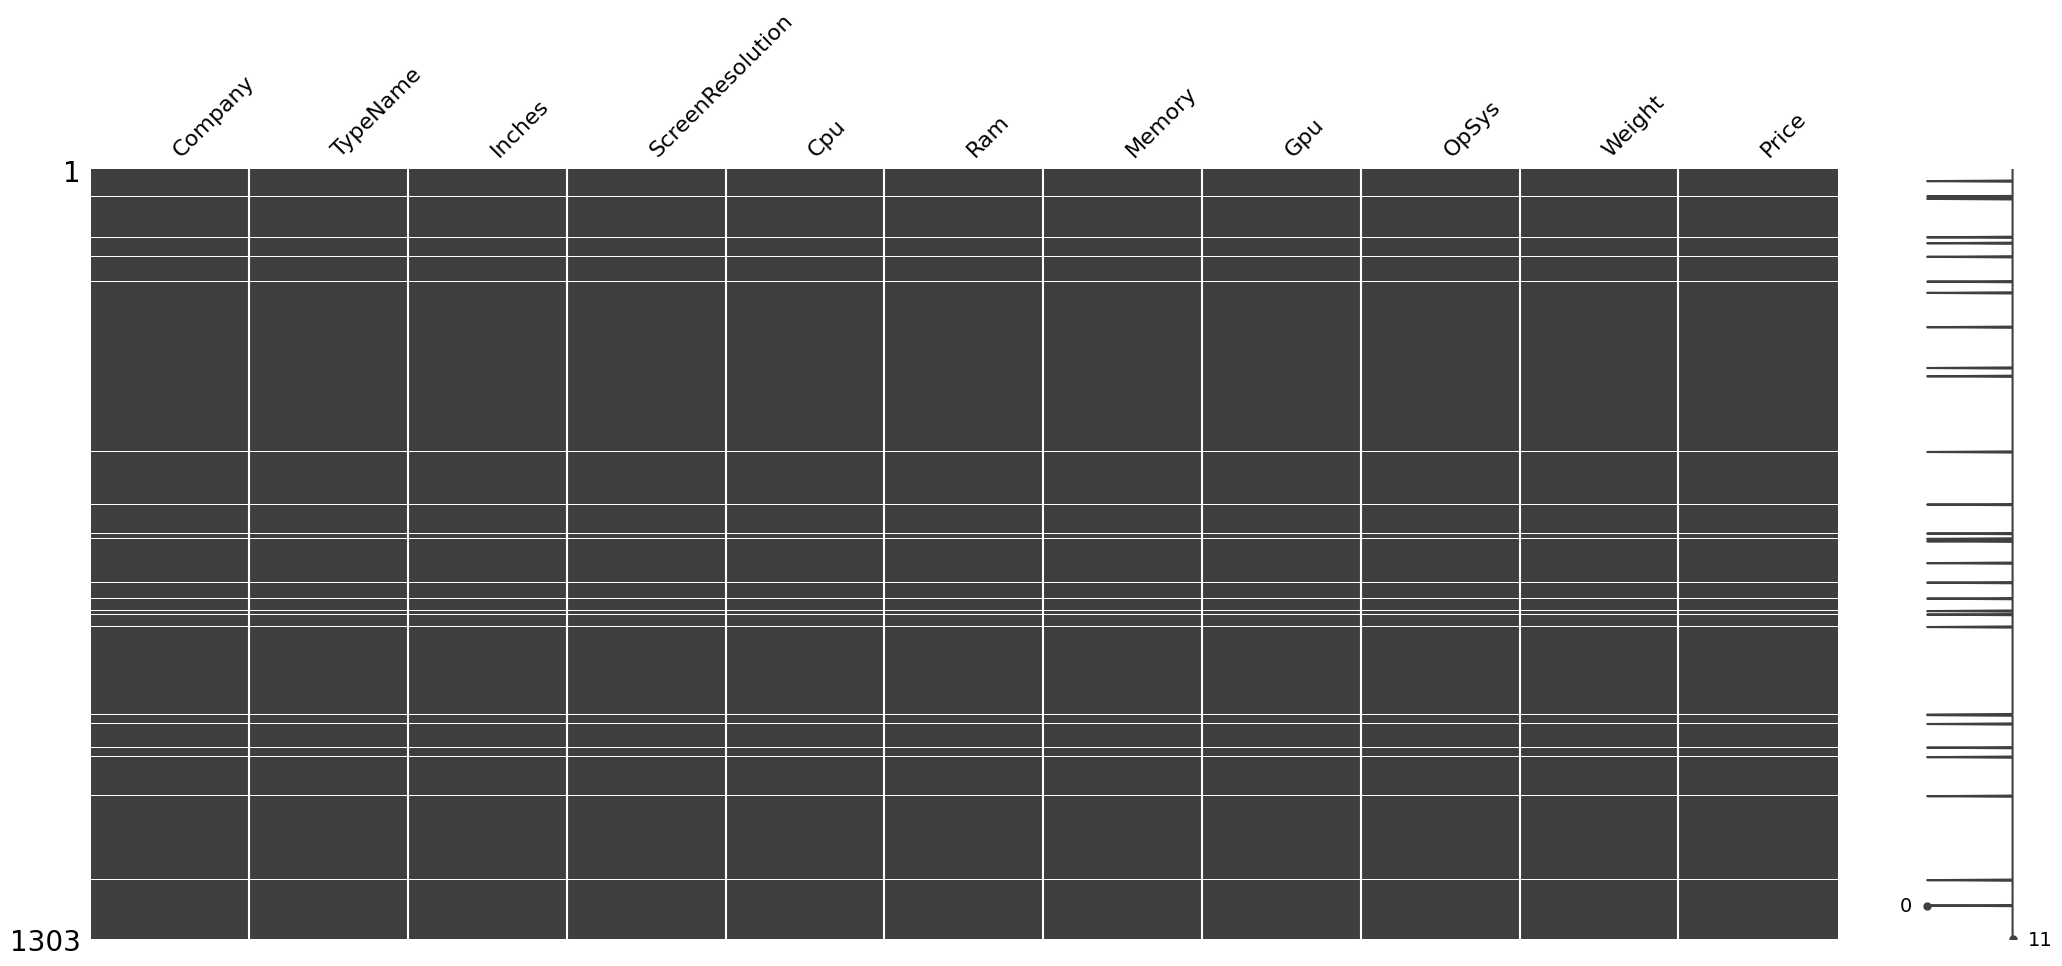

In [87]:
import missingno as msno
msno.matrix(data) # Visualizing the null values

In [88]:
data.drop(data[data['Company'].isnull()].index, inplace=True) # Removing  the rows having consistent null values in each column

<Axes: >

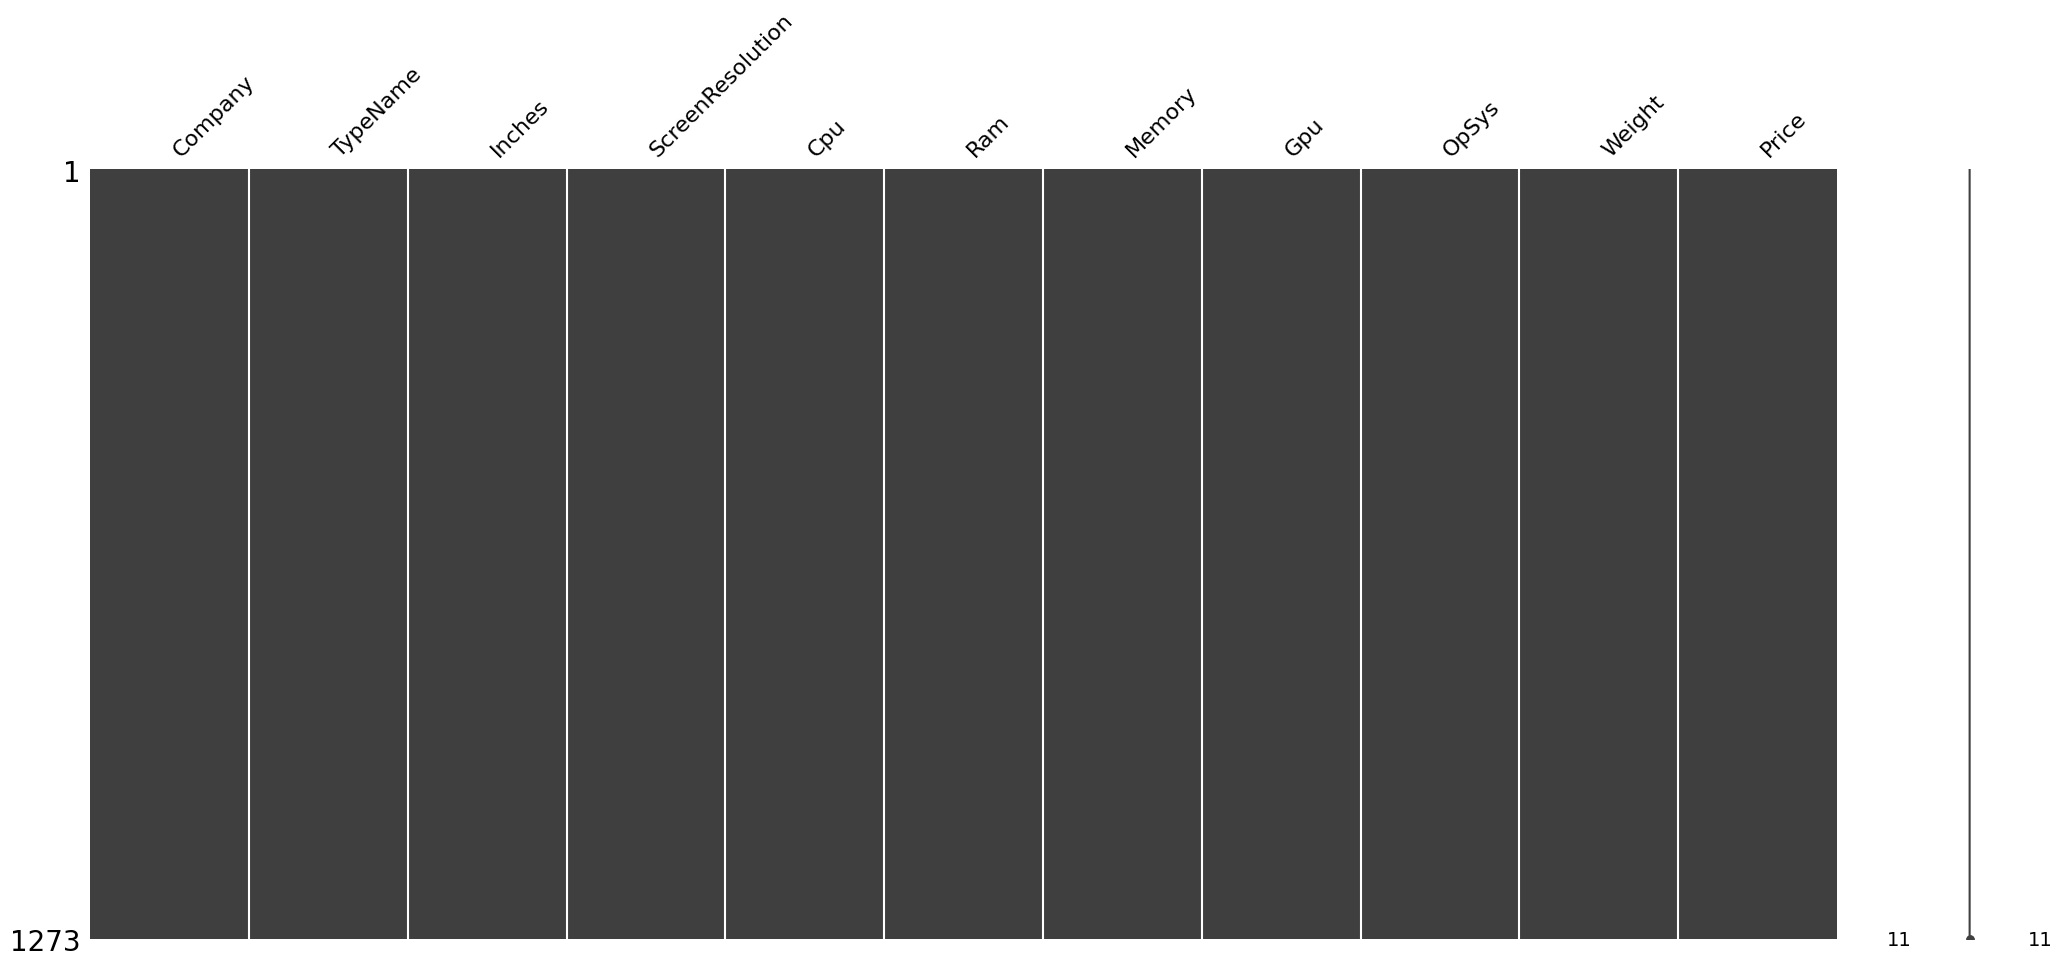

In [89]:
msno.matrix(data) # Visualization after removing the null containing rows

In [90]:
data.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [91]:
#Checking if each column has any unwanted values
data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [92]:
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [93]:
data['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [94]:
#Replacing ? with null value
for i in data.index:
  try:
    data.loc[i, 'Inches']=float(data.loc[i, 'Inches'])
  except:
   data.loc[i, 'Inches']=np.nan

In [95]:
data['Inches']=data['Inches'].astype('float') #Converting the datatype of the column

In [96]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

In [97]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

In [98]:
data['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [99]:
# Removing letters from the values and retaining only integer values
import re
for i in data.index:
  try:
    data.loc[i,'Ram']=int(re.findall('\d+', data.loc[i, 'Ram'])[0])
  except:
    data.loc[i, 'Ram']=np.nan

In [100]:
data['Ram'].unique()

array([8, 16, 4, 2, 12, 64, 6, 32, 24, 1], dtype=object)

In [101]:
data.rename(columns={'Ram':'Ram_in_GB'}, inplace=True) # Renaming the column

In [102]:
data['Ram_in_GB']=data['Ram_in_GB'].astype('int') # Changing the data type of the column

In [103]:
data['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [104]:
# Replacing the unwanted values with null values
for i in data.index:
  if data.loc[i,'Memory']=='?':
    data.loc[i,'Memory']=None

In [105]:
data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [106]:
data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [107]:
data['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [108]:
#Seperating the numbers from the letters and also replacing the unwanted values into null values
for i in data.index:
  try:
    data.loc[i, 'Weight']=float(re.findall('[^a-z]+', data.loc[i, 'Weight'])[0])
  except:
    data.loc[i, 'Weight']=np.nan

In [109]:
data['Weight']=data['Weight'].astype('float') #Converting the datatype of the column in float

In [110]:
data.rename(columns={'Weight': 'Weights_in_kg'}, inplace=True)

In [111]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_in_GB,Memory,Gpu,OpSys,Weights_in_kg,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [112]:
data.describe(include='all')

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_in_GB,Memory,Gpu,OpSys,Weights_in_kg,Price
count,1273,1273,1272.000000,1273,1273,1273.000000,1272,1273,1273,1272.000000,1273.000000
unique,19,6,NaN,40,118,NaN,39,110,9,NaN,NaN
top,Lenovo,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,NaN,256GB SSD,Intel HD Graphics 620,Windows 10,NaN,NaN
freq,290,710,NaN,495,183,NaN,401,271,1047,NaN,NaN
mean,NaN,NaN,15.130818,NaN,NaN,8.462687,NaN,NaN,NaN,2.077618,59955.814073
std,NaN,NaN,1.954436,NaN,NaN,5.564408,NaN,NaN,NaN,0.807808,37332.251005
min,NaN,NaN,10.100000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000200,9270.720000
25%,NaN,NaN,14.000000,NaN,NaN,4.000000,NaN,NaN,NaN,1.500000,31914.720000
50%,NaN,NaN,15.600000,NaN,NaN,8.000000,NaN,NaN,NaN,2.040000,52161.120000
75%,NaN,NaN,15.600000,NaN,NaN,8.000000,NaN,NaN,NaN,2.320000,79333.387200


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram_in_GB         1273 non-null   int64  
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weights_in_kg     1272 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 151.6+ KB


In [114]:
data.isnull().sum() # Checking the null values in the dataset

,0
Company,0
TypeName,0
Inches,1
ScreenResolution,0
Cpu,0
Ram_in_GB,0
Memory,1
Gpu,0
OpSys,0
Weights_in_kg,1


<Axes: ylabel='Ram_in_GB'>

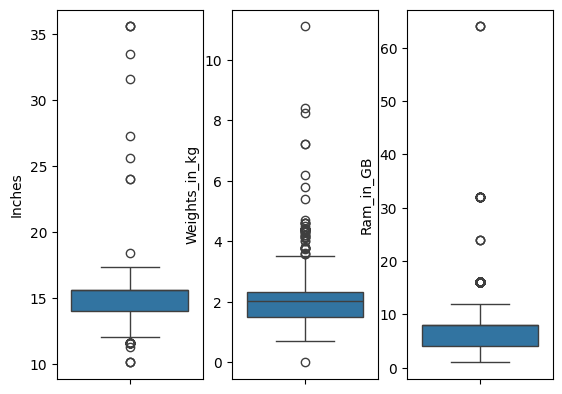

In [115]:
# Checking for outliers in the quantitative missing columns
fig, axes=plt.subplots(1, 3)
sns.boxplot(ax=axes[0], data=data, y='Inches')
sns.boxplot(ax=axes[1], data=data, y='Weights_in_kg')
sns.boxplot(ax=axes[2], data=data, y='Ram_in_GB')

Since the variables having the missing values have outliers and the number of missing values in each of the variable is just one we can go for median for quantitative variable and mode for categorical variable.

In [116]:
# Filling the missing values with median since the dataset contains outliers and only one value is missing in each column
from sklearn.impute import SimpleImputer
median_imputer=SimpleImputer(strategy='median')
data.loc[:,['Inches', 'Weights_in_kg']]=median_imputer.fit_transform(data.loc[:,['Inches', 'Weights_in_kg']])

In [117]:
# Replacing the null values of the categorical column with mode
mode_imputer=SimpleImputer(missing_values=None, strategy='most_frequent')
data.loc[:,['Memory']]=mode_imputer.fit_transform(data.loc[:,['Memory']])

In [118]:
data.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram_in_GB,0
Memory,0
Gpu,0
OpSys,0
Weights_in_kg,0


Handling the outliers using capping method.

In [119]:
Q3=data['Inches'].quantile(0.75)
Q1=data['Inches'].quantile(0.25)
IQR=Q3-Q1
ul=Q3+1.5*IQR
ll=Q1-1.5*IQR
data['Inches'].clip(ll, ul, inplace=True)

In [120]:
Q3=data['Weights_in_kg'].quantile(0.75)
Q1=data['Weights_in_kg'].quantile(0.25)
IQR=Q3-Q1
ul=Q3+1.5*IQR
ll=Q1-1.5*IQR
data['Weights_in_kg'].clip(ll, ul, inplace=True)

In [121]:
Q3=data['Ram_in_GB'].quantile(0.75)
Q1=data['Ram_in_GB'].quantile(0.25)
IQR=Q3-Q1
ul=Q3+1.5*IQR
ll=Q1-1.5*IQR
data['Ram_in_GB'].clip(ll, ul, inplace=True)

<Axes: ylabel='Ram_in_GB'>

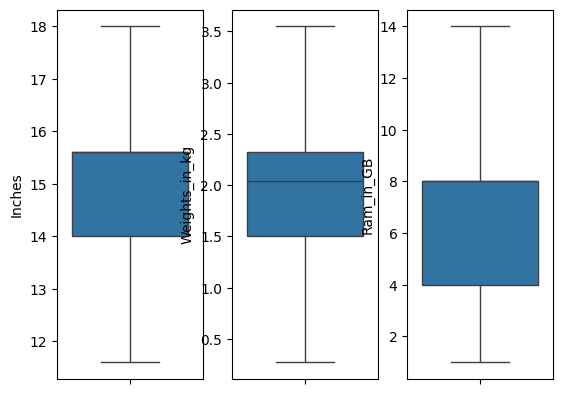

In [122]:
#Boxplots after handling the outliers
fig, axes=plt.subplots(1, 3)
sns.boxplot(ax=axes[0], data=data, y='Inches')
sns.boxplot(ax=axes[1], data=data, y='Weights_in_kg')
sns.boxplot(ax=axes[2], data=data, y='Ram_in_GB')

Checking the distribution of each of the quantitaitve variables

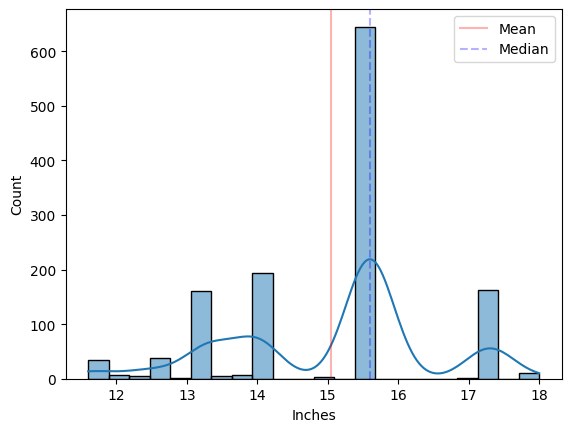

In [123]:
# Checking the skewness of the Inches data
sns.histplot(data['Inches'], kde=True)
plt.axvline(data.Inches.mean(), color='red', alpha=0.3, label='Mean')
plt.axvline(data.Inches.median(), ls='--', color='blue', alpha=0.3, label='Median')
plt.legend()

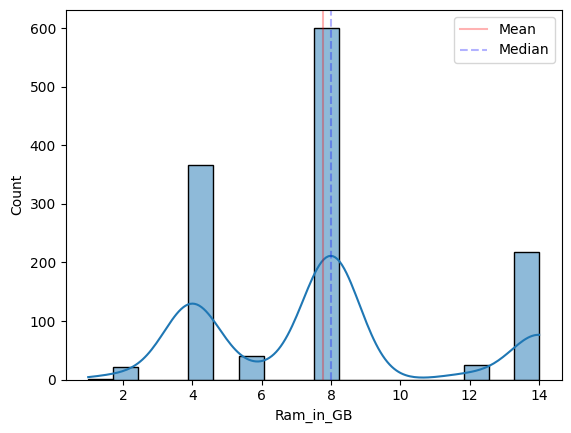

In [124]:
# Checking the skewness of the Ram_in_GB data
sns.histplot(data['Ram_in_GB'], kde=True)
plt.axvline(data.Ram_in_GB.mean(), color='red', alpha=0.3, label='Mean')
plt.axvline(data.Ram_in_GB.median(), ls='--', color='blue', alpha=0.3, label='Median')
plt.legend()

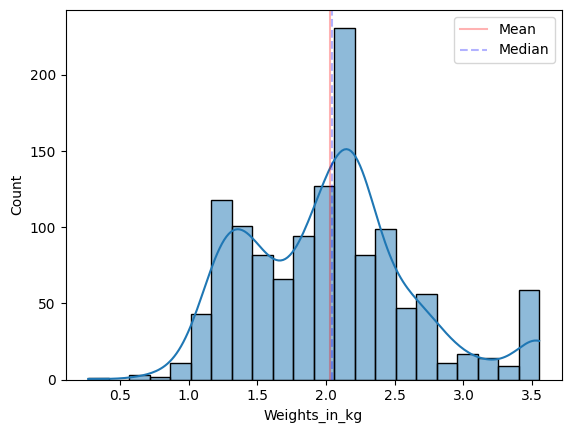

In [125]:
# Checking the skewness of the Weights_in_kg data
sns.histplot(data['Weights_in_kg'], kde=True)
plt.axvline(data.Weights_in_kg.mean(), color='red', alpha=0.3, label='Mean')
plt.axvline(data.Weights_in_kg.median(), ls='--', color='blue', alpha=0.3, label='Median')
plt.legend()

The quantitative variables in the dataset are not normally distributed it has many irregular datas but it is not highly skewed as well.

In [126]:
data.nunique() # Checking the unique values in each column

,0
Company,19
TypeName,6
Inches,16
ScreenResolution,40
Cpu,118
Ram_in_GB,7
Memory,39
Gpu,110
OpSys,9
Weights_in_kg,157


In [127]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_in_GB,Memory,Gpu,OpSys,Weights_in_kg,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# **Data Visualization**

<Axes: xlabel='Company', ylabel='Price'>

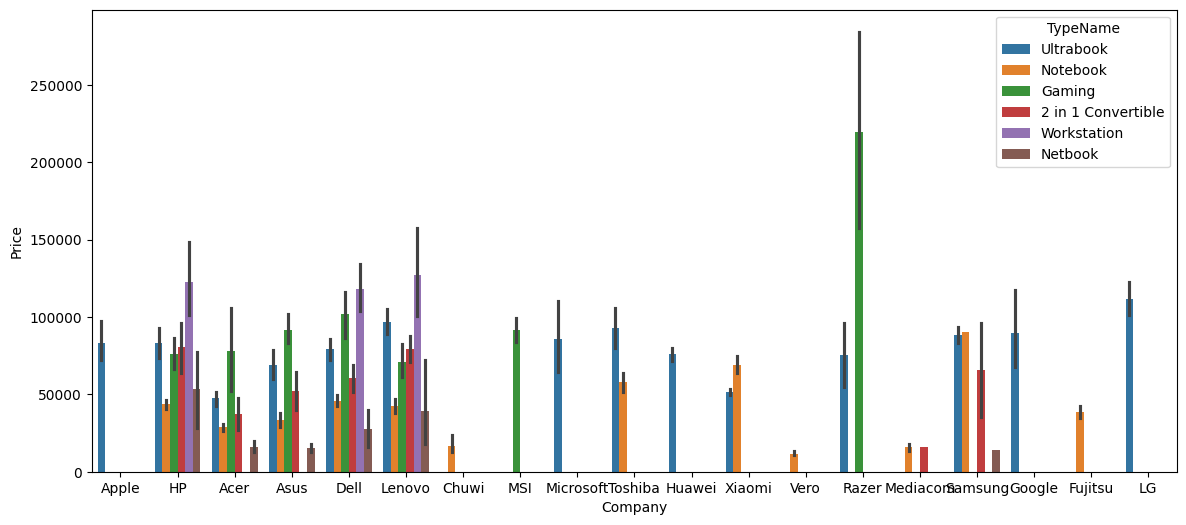

In [128]:
# Visualization of each variables with respect to price
plt.figure(figsize=(14, 6))
sns.barplot(data=data, x='Company', y='Price', hue='TypeName')

<Axes: xlabel='Price', ylabel='ScreenResolution'>

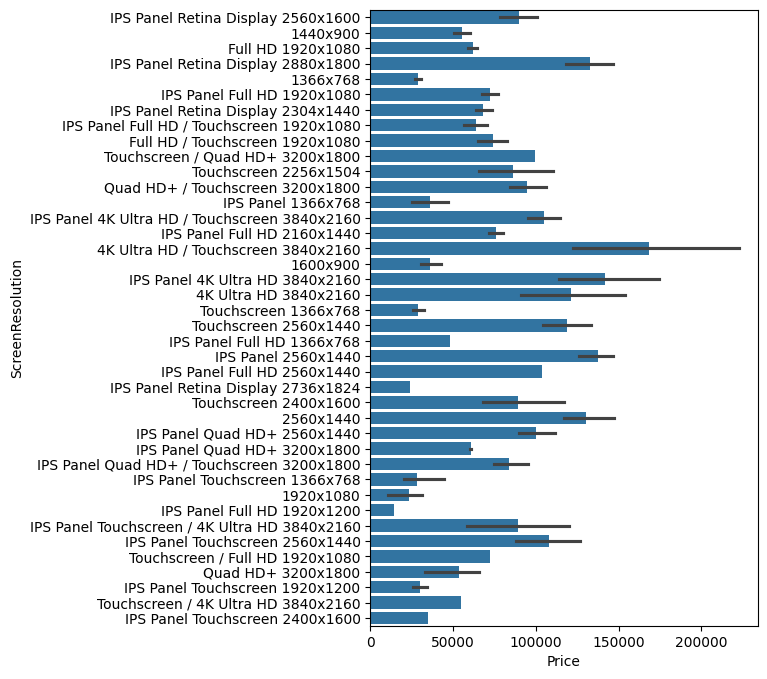

In [129]:
plt.figure(figsize=(5, 8))
sns.barplot(data, x='Price', y='ScreenResolution')

<Axes: xlabel='Price', ylabel='Memory'>

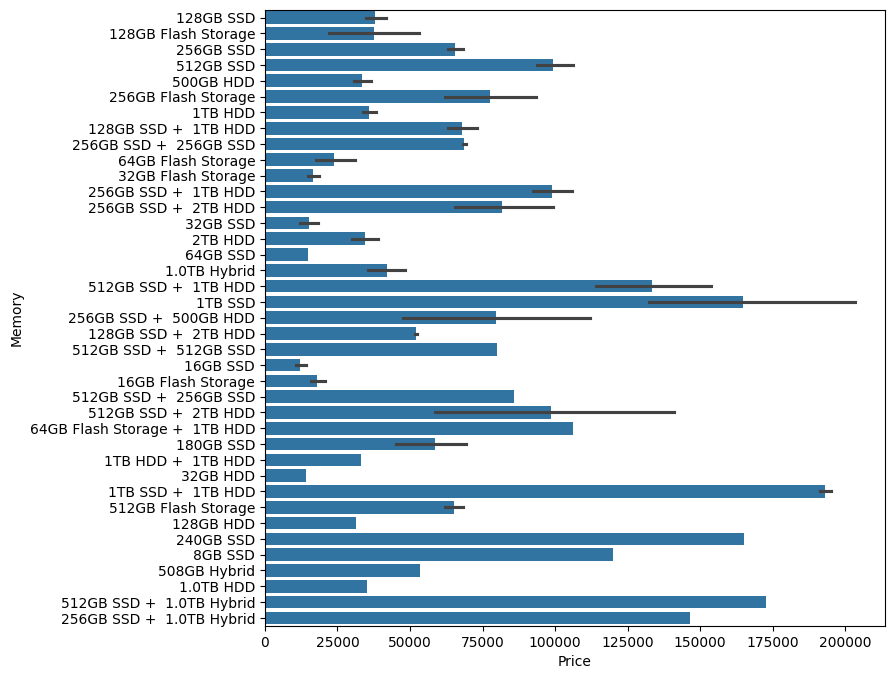

In [130]:
plt.figure(figsize=(8, 8))
sns.barplot(data, x='Price', y='Memory')

<Axes: xlabel='OpSys', ylabel='Price'>

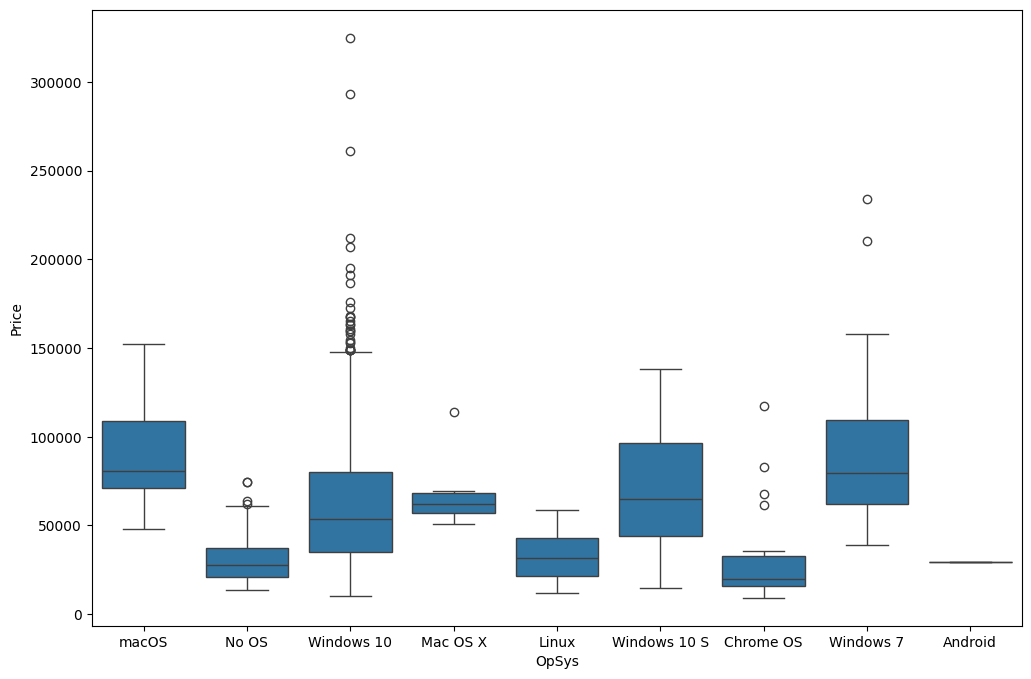

In [131]:
plt.figure(figsize=(12, 8))
sns.boxplot(data, y='Price', x='OpSys')

<Axes: xlabel='Inches', ylabel='Price'>

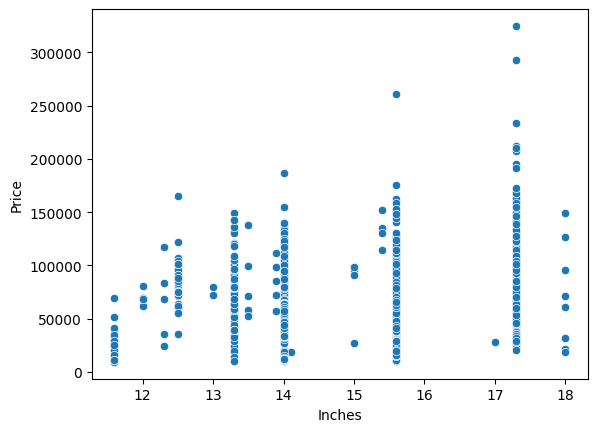

In [132]:
sns.scatterplot(data=data, x='Inches', y='Price')

<Axes: xlabel='Ram_in_GB', ylabel='Price'>

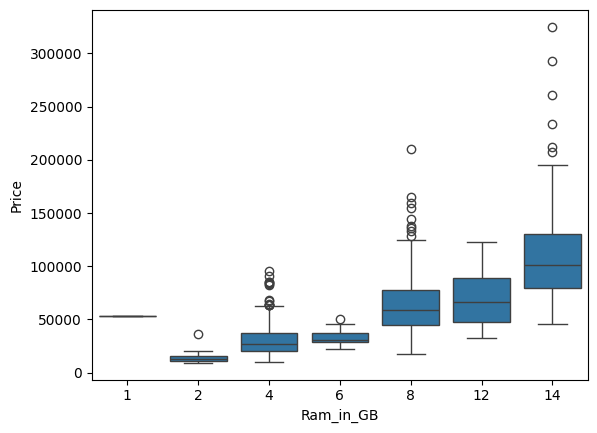

In [133]:
sns.boxplot(data=data, x='Ram_in_GB', y='Price')

<Axes: xlabel='Weights_in_kg', ylabel='Price'>

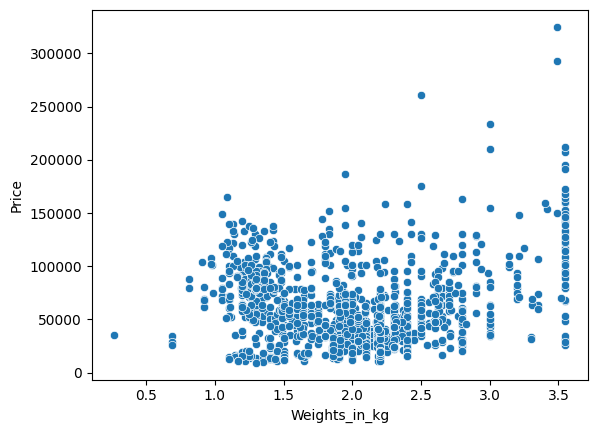

In [134]:
sns.scatterplot(data=data, x='Weights_in_kg', y='Price')

<Axes: xlabel='Price', ylabel='Cpu'>

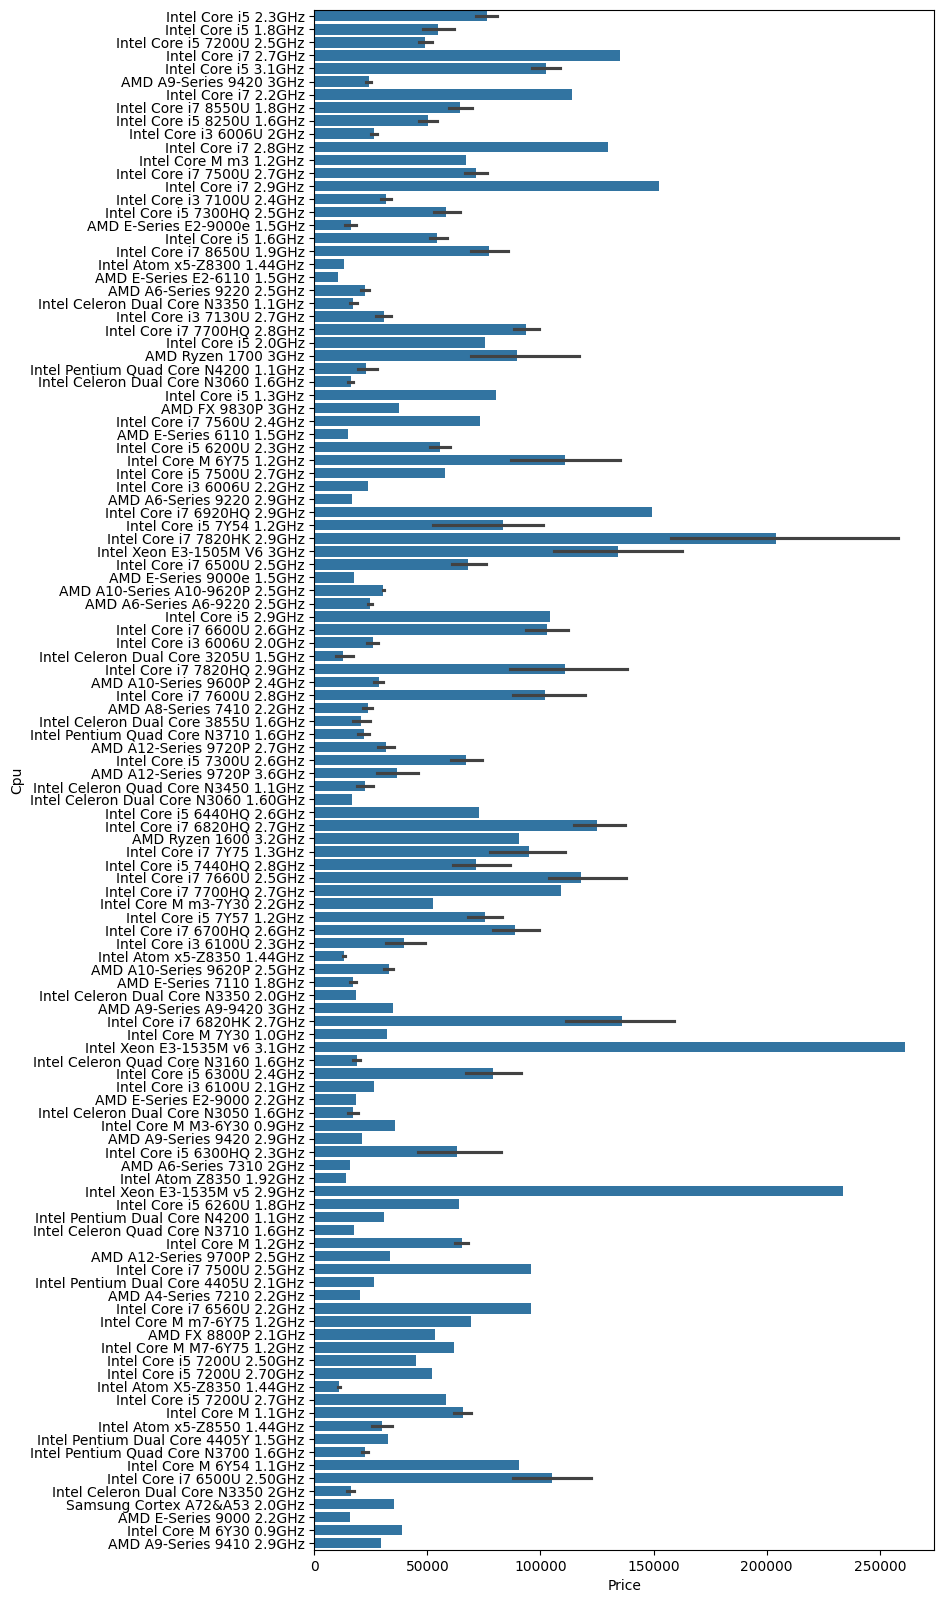

In [135]:
plt.figure(figsize=(8, 20))
sns.barplot(data=data, x='Price', y='Cpu')

<Axes: xlabel='Price', ylabel='Gpu'>

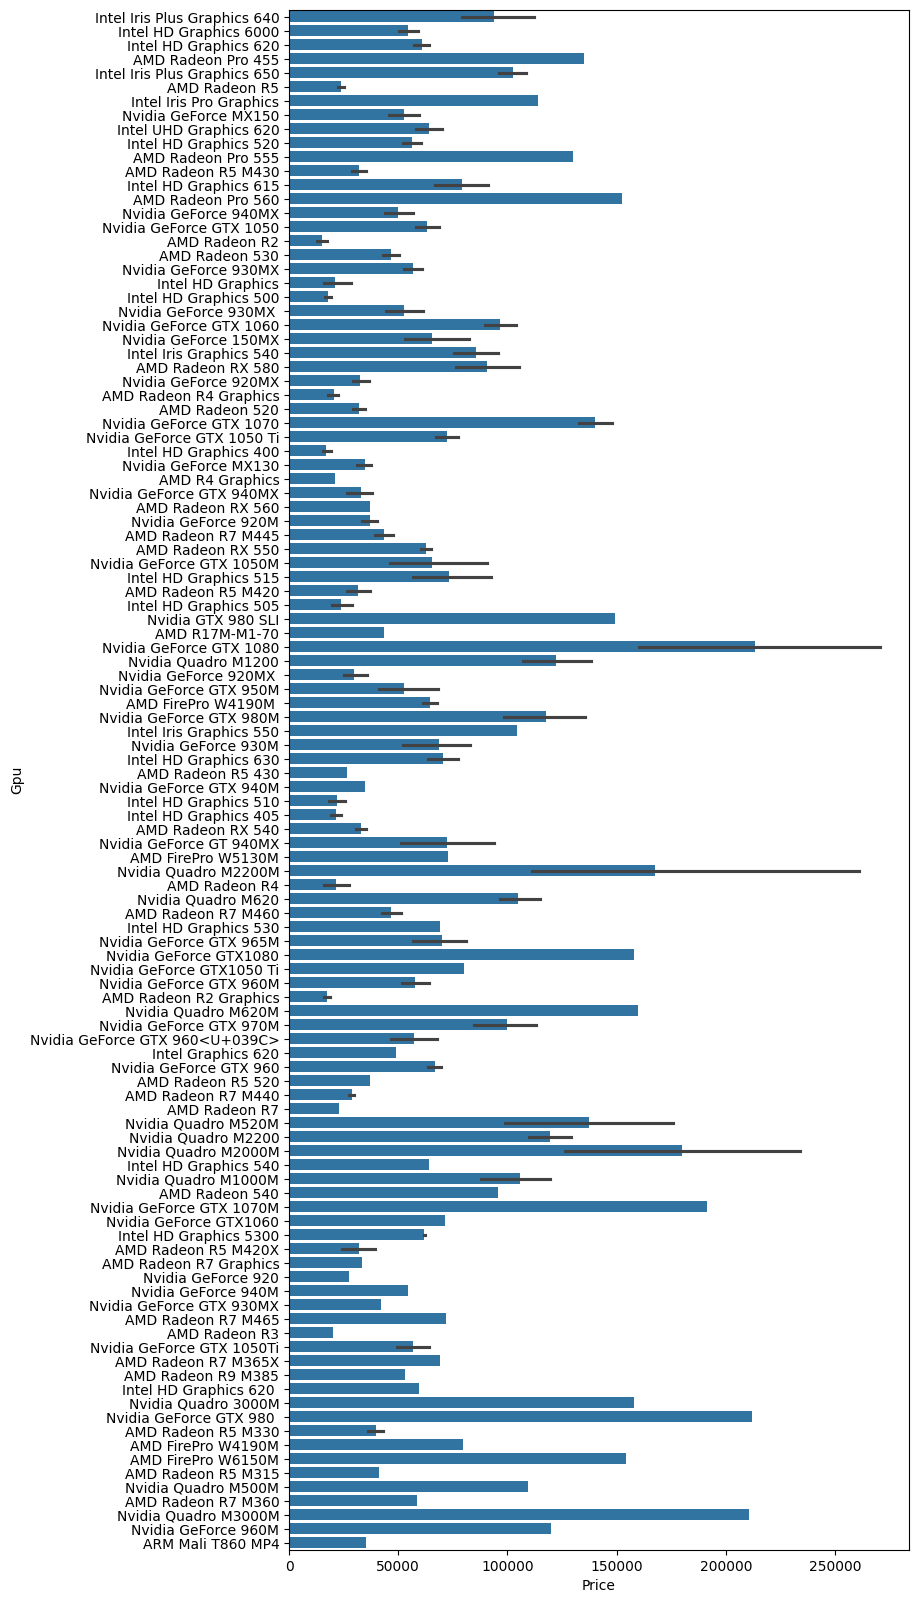

In [136]:
plt.figure(figsize=(8, 20))
sns.barplot(data=data, x='Price', y='Gpu')

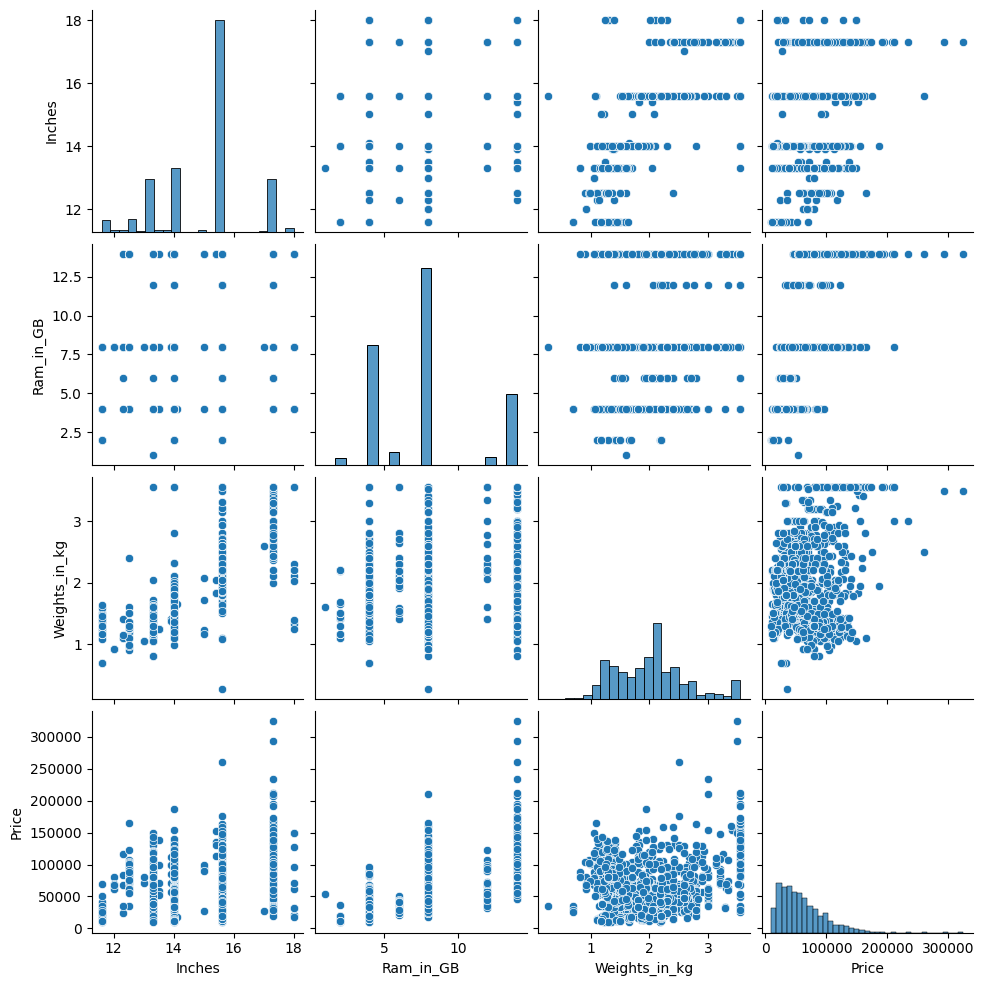

In [137]:
sns.pairplot(data)

We clearly don't see any linear correlation between any of the numerical variables

In [138]:
data_copy=data.copy(deep=True) # Creating a copy of the data
data_copy.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_in_GB,Memory,Gpu,OpSys,Weights_in_kg,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


We can observe that except for company variable which is nominal all the other categorical variables has some order in it based on price. So we will encode company variable using OneHotEncoder and all the other variables using OrdinalEncoder.

In [139]:
from sklearn.compose import ColumnTransformer # ColumnTransformer is used for transforming all the columns at once
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
ct=ColumnTransformer(
    [("Encoder1", OneHotEncoder(drop='first'), ['Company']),
    ("Encoder2", OrdinalEncoder(), ['TypeName', 'ScreenResolution', 'Memory', 'Cpu', 'Gpu', 'OpSys'])],
    remainder='passthrough', verbose_feature_names_out=False
)
data_copy=pd.DataFrame(ct.fit_transform(data_copy), columns=ct.get_feature_names_out())
data_copy.head()

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,...,TypeName,ScreenResolution,Memory,Cpu,Gpu,OpSys,Inches,Ram_in_GB,Weights_in_kg,Price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,23.0,4.0,65.0,58.0,8.0,13.3,8.0,1.37,71378.6832
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,2.0,63.0,51.0,8.0,13.3,8.0,1.34,47895.5232
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,8.0,16.0,74.0,53.0,4.0,15.6,8.0,1.86,30636.0000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,25.0,29.0,85.0,9.0,8.0,15.4,14.0,1.83,135195.3360
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,23.0,16.0,67.0,59.0,8.0,13.3,8.0,1.37,96095.8080


In [140]:
data_copy.shape

(1273, 28)

Since the data is not normally distributed we will see the correlation between the variables using spearman method

In [141]:
data_copy.corr(method='spearman') # Checking the correlation between the variables

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,...,TypeName,ScreenResolution,Memory,Cpu,Gpu,OpSys,Inches,Ram_in_GB,Weights_in_kg,Price
Company_Apple,1.000000,-0.048400,-0.006295,-0.069873,-0.005137,-0.006295,-0.066563,-0.005137,-0.006295,-0.070344,...,0.199473,0.123202,0.011085,-0.097873,-0.039115,0.096835,-0.173755,0.057462,-0.155274,0.101802
Company_Asus,-0.048400,1.000000,-0.018163,-0.201622,-0.014824,-0.018163,-0.192071,-0.014824,-0.018163,-0.202982,...,-0.117345,-0.055446,0.020818,0.034872,0.125483,-0.020462,0.121734,0.050530,0.098948,-0.012529
Company_Chuwi,-0.006295,-0.018163,1.000000,-0.026222,-0.001928,-0.002362,-0.024980,-0.001928,-0.002362,-0.026399,...,0.008992,0.024058,0.084526,-0.071617,-0.055691,0.009336,-0.014554,-0.051478,-0.029775,-0.075013
Company_Dell,-0.069873,-0.201622,-0.026222,1.000000,-0.021402,-0.026222,-0.277286,-0.021402,-0.026222,-0.293039,...,0.040238,-0.091011,-0.050148,0.160933,-0.071265,-0.039773,0.039804,0.102571,0.080274,0.061626
Company_Fujitsu,-0.005137,-0.014824,-0.001928,-0.021402,1.000000,-0.001928,-0.020388,-0.001574,-0.001928,-0.021546,...,0.007339,-0.056046,0.000385,-0.022278,-0.011028,0.007620,0.016599,-0.019490,0.025463,-0.022669
Company_Google,-0.006295,-0.018163,-0.002362,-0.026222,-0.001928,1.000000,-0.024980,-0.001928,-0.002362,-0.026399,...,0.074858,0.086473,-0.001776,0.024764,-0.015909,-0.123548,-0.084339,0.033924,-0.079532,0.048517
Company_HP,-0.066563,-0.192071,-0.024980,-0.277286,-0.020388,-0.024980,1.000000,-0.020388,-0.024980,-0.279157,...,0.110051,-0.048097,0.038331,-0.074670,-0.105247,0.129999,-0.033127,-0.124907,-0.113468,-0.019964
Company_Huawei,-0.005137,-0.014824,-0.001928,-0.021402,-0.001574,-0.001928,-0.020388,1.000000,-0.001928,-0.021546,...,0.061097,0.060759,0.030007,0.008256,0.002499,0.007620,-0.064018,0.010905,-0.066532,0.031763
Company_LG,-0.006295,-0.018163,-0.002362,-0.026222,-0.001928,-0.002362,-0.024980,-0.001928,1.000000,-0.026399,...,0.074858,0.045803,0.073058,0.050170,0.003062,0.009336,0.000166,0.033924,-0.081253,0.068025
Company_Lenovo,-0.070344,-0.202982,-0.026399,-0.293039,-0.021546,-0.026399,-0.279157,-0.021546,-0.026399,1.000000,...,-0.071509,0.142863,-0.017578,-0.060538,-0.004535,-0.052302,-0.039420,-0.024643,0.001994,-0.037073


From the above correlation table we can clearly see that the price of the laptop is slightly correlated with the memory, moderately correlated with ScreenResolution, CPU, GPU and OperatingSystem and highly correlated with Ram.

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #Checking for multicolinearity
vif=pd.DataFrame()
X=data_copy.drop(columns=['Price'])
y=data_copy['Price']
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF
0,Company_Apple,1.387384
1,Company_Asus,2.682764
2,Company_Chuwi,1.056803
3,Company_Dell,4.238644
4,Company_Fujitsu,1.023103
5,Company_Google,1.116259
6,Company_HP,3.989192
7,Company_Huawei,1.033354
8,Company_LG,1.067541
9,Company_Lenovo,4.110600


For any column having VIF_value>5 there exists high correlation between the variables so we should drop those columns. But by droping those columns, we will miss out the crucial columns which are very important for price prdiction of the laptops. So instead of droping those columns we will avoid using parametric ML models for price prediction.

In [143]:
from sklearn.preprocessing import StandardScaler # Feature scaling using standardization
ss=StandardScaler()
X=ss.fit_transform(X)

In [144]:
from sklearn.model_selection import train_test_split # Splitting the data into 80-20 for training
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

# **ML Models**

**Decision Tree Regressor**

In [145]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [146]:
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test, y_pred))
print("Adjusted R2", 1-(1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MAE 13071.212696470588
MSE 545026608.40694
RMSE 23345.8049423647
R2 Score 0.6810770481187512
Adjusted R2 0.6431434811549023


**Hyperparameter Tuning using RandomizedSearchCV-**
We are using RandomizedSearchCV instead of SearchGridCV for hyperparameter tuning which takes less time and less cpu power as compared to SearchGridCV

In [147]:
parameters={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features':['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes':[None, 10, 20, 30, 40, 50, 60, 70, 80, 90]
}

In [148]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(estimator=dt, param_distributions=parameters, n_iter=200, n_jobs=-1, scoring='neg_mean_absolute_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=200, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_absolute_error')

In [149]:
# Deriving the best parameters and best score
print('Best parameters', rs.best_params_)
print('Best score', rs.best_score_)

Best parameters {'splitter': 'best', 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_leaf_nodes': 50, 'max_features': None, 'max_depth': 10, 'criterion': 'poisson'}
Best score -13048.004170905911


Using the best parameters obtained from RandomizedSearchCV we will obtain the result

In [150]:
dt=DecisionTreeRegressor(splitter='best', min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=50, max_features=None, max_depth=10, criterion='poisson')
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [151]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test, y_pred))
print("Adjusted R2", 1-(1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MAE 13825.909975215038
MSE 435851726.9641794
RMSE 20877.062220632946
R2 Score 0.7449608565859769
Adjusted R2 0.7146258042856306


Using Hyperparameter Tuning for Decision Tree Regressor we got better scores.

**Random Forest Regressor**- Bagging method

In [152]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [154]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test, y_pred))
print("Adjusted R2", 1-(1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MAE 10069.86774189647
MSE 260958944.88364342
RMSE 16154.223747479897
R2 Score 0.8472995708129396
Adjusted R2 0.8291369646981791


**Hyperparameter Tuning using RandomizedSearchCV**

In [155]:
parameters={
    'n_estimators':[50,100,200,300,400,500],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes':[None, 10, 20, 30, 40, 50, 60, 70, 80, 90],
    'bootstrap':[True, False],
    'oob_score':[True, False],
    'warm_start':[True, False]
}

In [156]:
rs=RandomizedSearchCV(estimator=rf, param_distributions=parameters, n_iter=200, n_jobs=-1, scoring='neg_mean_absolute_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500],
                                        'oob_score': [True, False],
                                        'warm_start': [True, False]},
                   scoring='neg_mean_absolute_error')

In [157]:
# Deriving the best parameters and best score
print('Best parameters', rs.best_params_)
print('Best score', rs.best_score_)

Best parameters {'warm_start': True, 'oob_score': True, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'poisson', 'bootstrap': True}
Best score -11167.436394759623


In [158]:
rf=RandomForestRegressor(warm_start=True, oob_score=True, n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_leaf_nodes=None, max_features='sqrt', max_depth=9, criterion='poisson', bootstrap=True)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [159]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test, y_pred))
print("Adjusted R2", 1-(1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MAE 11965.646754937148
MSE 325145969.7296858
RMSE 18031.804394726718
R2 Score 0.8097404587978239
Adjusted R2 0.7871104693156267


For Random Forest Regressor the hyperparameter tuning does not bring any significant improvement instead it performs worst.

**XGBoost Regressor-**Boosting method

In [160]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred=xgbr.predict(X_test)

In [161]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test, y_pred))
print("Adjusted R2", 1-(1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MAE 9452.94909673407
MSE 215155645.8499636
RMSE 14668.184817828129
R2 Score 0.8741014243525633
Adjusted R2 0.8591267039011061


**Hyperparameter Tuning using RandomizedSearchCV**

In [162]:
parameters={
    'booster':['gbtree', 'gblinear', 'dart'],
    'eta':[0.1, 0.3, 0.5, 0.7, 0.9],
    'sampling_method':['uniform', 'gradient_based'],
    'max_depth':[2,4,6,8,10,12,14,18]
}

In [163]:
rs=RandomizedSearchCV(estimator=xgbr, param_distributions=parameters, n_iter=200, n_jobs=-1, scoring='neg_mean_absolute_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'eta': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      18],
                                        'sampling_method': ['uniform',
                                                            'gradient_based']},
                   scoring='neg_mean_absolute_error')

In [164]:
# Deriving the best parameters and best score
print('Best parameters', rs.best_params_)
print('Best Score', rs.best_score_)

Best parameters {'sampling_method': 'uniform', 'max_depth': 4, 'eta': 0.3, 'booster': 'gbtree'}
Best Score -9782.133821887972


In [165]:
xgbr=XGBRegressor(sampling_method='uniform', max_depth=4, eta=0.3, booster='gbtree')
xgbr.fit(X_train, y_train)
y_pred=xgbr.predict(X_test)

In [166]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test, y_pred))
print("Adjusted R2", 1-(1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MAE 9449.541489932599
MSE 208711892.2876626
RMSE 14446.864444842784
R2 Score 0.8778719942212366
Adjusted R2 0.8633457556484322


For XGBRegressor the Hyperparameter tuning gives us the better result with minimized errors

**Support Vector Machine**

In [167]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train, y_train)
y_pred=svr.predict(X_test)

In [168]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test, y_pred))
print("Adjusted R2", 1-(1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MAE 32155.862689066278
MSE 1959515454.7800264
RMSE 44266.41452365468
R2 Score -0.1466127404715094
Adjusted R2 -0.28299399154080795


**Hyperparameter Tuning using RandomizedSearchCV**

In [169]:
parameters={
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[1,2,3,4,5,6,7,8,9,10],
    'gamma':['scale', 'auto'],
    'coef0':[0.0, 0.5, 1.0, 1.5, 2.0],
    'shrinking':[True, False]
}

In [170]:
rs=RandomizedSearchCV(estimator=svr, param_distributions=parameters, n_iter=200, n_jobs=-1, scoring='neg_mean_absolute_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVR(), n_iter=200, n_jobs=-1,
                   param_distributions={'coef0': [0.0, 0.5, 1.0, 1.5, 2.0],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   scoring='neg_mean_absolute_error')

In [171]:
# Deriving the best parameters and best score
print('Best parameters', rs.best_params_)
print('Best Score', rs.best_score_)

Best parameters {'shrinking': True, 'kernel': 'poly', 'gamma': 'scale', 'degree': 10, 'coef0': 2.0}
Best Score -12295.13547688022


In [172]:
svr=SVR(shrinking=False, kernel='poly', gamma='scale', degree=10, coef0=2.0)
svr.fit(X_train, y_train)
y_pred=svr.predict(X_test)

In [173]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test, y_pred))
print("Adjusted R2", 1-(1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MAE 13763.193967043971
MSE 408023536.27635914
RMSE 20199.59247797735
R2 Score 0.7612445546344352
Adjusted R2 0.7328463298552711


For SVM also the Hyperparameter tuning gives us improved result

**Conclusion-**
Out of all the non-parametric approaches we used, XGBoost Regressor with Hyperarameter Tuning has performed the best with least errors in predictions.

We have seen that RAM has the most influence on the price of the laptop followed by CPU, GPU, Screen Resolution and Operating System.